In [34]:
import pandas as pd
import numpy as np
import math

In [35]:
## Read data from source

In [36]:
file = 'data.xlsx'
df = pd.read_excel(file, header=None)
nr_rows = df.shape[0]
nr_cols = df.shape[1]
df.head()



,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
## Convert Y feature to number
def numberize(value): 
    return 1 if value == 'M' else 0

df[0] = df[0].apply(lambda x: numberize(x))

    
## Normalize data
def norm(vector):
    min = np.amin(vector)
    max = np.amax(vector)
    return (vector - min) / (min - max )

for i in range(nr_cols):
    df[:][i] = norm(df[:][i])
    
## Predict 0 or 1 based on [0,1] range    
def predict_from_value(val):
    return 1 if val >= 0.5 else 0

    
df.head()    

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,-0.521037,-0.022658,-0.545989,-0.363733,-0.593753,-0.792037,-0.703140,-0.731113,-0.686364,...,-0.620776,-0.141525,-0.668310,-0.450698,-0.601136,-0.619292,-0.568610,-0.912027,-0.598462,-0.418864
1,1,-0.643144,-0.272574,-0.615783,-0.501591,-0.289880,-0.181768,-0.203608,-0.348757,-0.379798,...,-0.606901,-0.303571,-0.539818,-0.435214,-0.347553,-0.154563,-0.192971,-0.639175,-0.233590,-0.222878
2,1,-0.601496,-0.390260,-0.595743,-0.449417,-0.514309,-0.431017,-0.462512,-0.635686,-0.509596,...,-0.556386,-0.360075,-0.508442,-0.374508,-0.483590,-0.385375,-0.359744,-0.835052,-0.403706,-0.213433
3,1,-0.210090,-0.360839,-0.233501,-0.102906,-0.811321,-0.811361,-0.565604,-0.522863,-0.776263,...,-0.248310,-0.385928,-0.241347,-0.094008,-0.915472,-0.814012,-0.548642,-0.884880,-1.000000,-0.773711
4,1,-0.629893,-0.156578,-0.630986,-0.489290,-0.430351,-0.347893,-0.463918,-0.518390,-0.378283,...,-0.519744,-0.123934,-0.506948,-0.341575,-0.437364,-0.172415,-0.319489,-0.558419,-0.157500,-0.142595


In [38]:
## Split X and Y
X = df.ix[:,1:]
Y = df.ix[:,0]


In [39]:
## Add '1' - Feature
ones = np.ones(nr_rows, dtype=np.int)
X.insert(0, '', ones)
X.columns = range(df.shape[1])
X.head()


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1,-0.521037,-0.022658,-0.545989,-0.363733,-0.593753,-0.792037,-0.703140,-0.731113,-0.686364,...,-0.620776,-0.141525,-0.668310,-0.450698,-0.601136,-0.619292,-0.568610,-0.912027,-0.598462,-0.418864
1,1,-0.643144,-0.272574,-0.615783,-0.501591,-0.289880,-0.181768,-0.203608,-0.348757,-0.379798,...,-0.606901,-0.303571,-0.539818,-0.435214,-0.347553,-0.154563,-0.192971,-0.639175,-0.233590,-0.222878
2,1,-0.601496,-0.390260,-0.595743,-0.449417,-0.514309,-0.431017,-0.462512,-0.635686,-0.509596,...,-0.556386,-0.360075,-0.508442,-0.374508,-0.483590,-0.385375,-0.359744,-0.835052,-0.403706,-0.213433
3,1,-0.210090,-0.360839,-0.233501,-0.102906,-0.811321,-0.811361,-0.565604,-0.522863,-0.776263,...,-0.248310,-0.385928,-0.241347,-0.094008,-0.915472,-0.814012,-0.548642,-0.884880,-1.000000,-0.773711
4,1,-0.629893,-0.156578,-0.630986,-0.489290,-0.430351,-0.347893,-0.463918,-0.518390,-0.378283,...,-0.519744,-0.123934,-0.506948,-0.341575,-0.437364,-0.172415,-0.319489,-0.558419,-0.157500,-0.142595


In [40]:
## Prepare training set and testing datasets

In [41]:
X_train = X.head(300)
Y_train = Y.head(300)

In [42]:
nr_test_rows = nr_rows - 300
X_test = X.tail(nr_test_rows)
Y_test = Y.tail(nr_test_rows)

In [43]:
## Define helper methods

In [44]:
def sig(z):
    return 1 / (1 + math.e ** (-1*z))

In [61]:
%matplotlib inline
import time
import pylab as pl
from IPython import display

    

def gradient_descent(X, Y, alpha=0.1, max_iterations=100):
    predictions = []
    Theta = np.zeros(X.shape[1], dtype=np.int)  # Starting Theta
    
    while (max_iterations > 0):
        prediction = sig(np.dot(X,Theta))
        Theta = Theta + (alpha * (Y - prediction) * prediction * (1 - prediction)).dot(X)
        predictions.append(prediction)
        max_iterations -= 1
    
    return [predictions, Theta]

crisp_predictor = lambda x: 1 if x >= 0.5 else 0



In [98]:
# Main Function

def accuracy(crisp, Y):
    # Subtract predictions from the real values and count the 1's
    difference = pd.Series(crisp - Y)
    correct_predictions = (difference == 0).sum()
    total_predictions = crisp.shape[0]

    return (correct_predictions / total_predictions * 100)

In [75]:
def quality_by_iteration(alpha, max_iterations):
    predictions_by_iteration = gradient_descent(X_train, Y_train, alpha, max_iterations)[0]
    
    
    qualities = []
    for prediction in predictions_by_iteration:
        crisp = pd.Series(prediction).apply(crisp_predictor)
        quality = accuracy(crisp, Y_train)
        qualities.append(quality)

    return qualities    

        

In [76]:
    alpha = 0.03
    max_iterations = 1000
    
qualities = pd.Series(quality_by_iteration(alpha, max_iterations))    

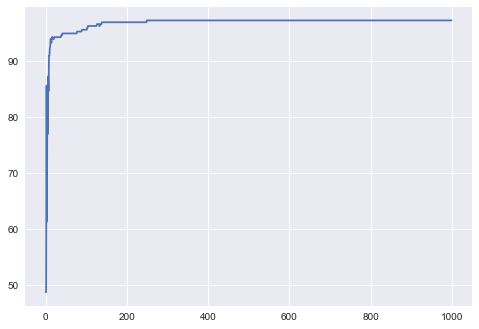

In [77]:
plt.plot(qualities.index.values, qualities)
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.show()

In [78]:
import seaborn as sns; sns.set(color_codes=True)

In [79]:
x = np.array(qualities)

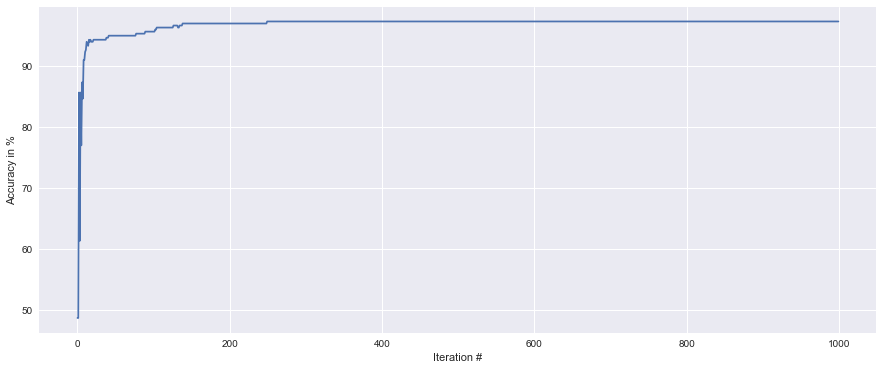

In [80]:
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(15, 6))
plt.plot(qualities.index.values, qualities)
plt.ylabel('Accuracy in %')
plt.xlabel('Iteration #')
plt.show()
#ax = sns.tsplot(x)

In [81]:
def quality_test(Theta, X, Y):
    predictions = sig(np.dot(X,Theta))
    crisp = pd.Series(predictions).apply(crisp_predictor)
    quality = accuracy(crisp, Y)
    return quality

        

In [124]:
final_theta = predictions_by_iteration = gradient_descent(X_train, Y_train, alpha, max_iterations)[1]
predictions = sig(np.dot(X_test,final_theta))
crisp = pd.Series(predictions).apply(crisp_predictor)

# Subtract predictions from the real values and count the 1's
accuracy(crisp, Y_test.values)

97.769516728624538

0    1
1    0
2    1
3    0
4    0
dtype: int64